<a href="https://colab.research.google.com/github/bngrossmann/food-sales-predictions/blob/main/food_sales_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Prediction
-Benjamin N. Grossmann

This project is currently a work in progress.

---
# ▶ Loading and Examining the Data
___


In [1]:
import numpy as np
import pandas as pd

filename = "/content/drive/MyDrive/Coding Dojo/Data Folder/sales_predictions.csv"
df_sales = pd.read_csv(filename)
display(df_sales.head())
display(df_sales.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

>There are 8523 rows of data across 12 columns.

>A comparison of the datatypes for each column to the expected information type (infered from the information displayed in the `.head()` above) appears to be consistent.
>
>data description | data type | column name
-|-|-
alphanumeric codes |`object`| `Item_Identifier`, `Outlet_Identifier`
qualitative categories | `object` | `Item_Fat_Content`, `Item_Type`, `Outlet_Size`, `Outlet_Location`, `Outlet_Type`
quantitative measurement | `float64` | `Item_Weight`, `Item_Visibiltiy`, `Item_MRP`, `Item_Outlet_Sales`
year | `int64` | `Outlet_Establishment_Year`
>
>(I will note that we are not given the units of measure for any of the numeric quantities at this time.)




---
Because there are Item_Identifier and Outlet_Identifier values, I am inferring these should be unique for each item and each outlet.

In [2]:
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

>There are 1559 unique `Item_Identifier` values and 10 unique `Outlet_Identifier` values. Since each item can potentially be sold at each outlet, there will be at most 15,590 unique item-outlet pairs. Since there are only 8523 rows of data, there is no obvious red flag of duplicated data rows.

>However, there could still be duplicated data rows present. Because each row should be unique, an attempt to drop any duplicates should still be made.

In [3]:
df_sales.drop_duplicates(keep=False, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


>No rows were dropped, so there are no idendifiable duplicates.

---
# ▶ Checking Category Names for Consistency

---

>There may also be a problem with inconsistent category names. Checking each of the qualitative categories can be done with a `.unique()` or `.value_counts()` method. I find the alignment of the  `.value_counts()` method to be easier to read quickly. I can also the series with `.sort_index()` to get the series in capitalization-alphabetical order. This will make it easier to spot similar entries.

>First, the `Item_Fat_Content` column values.

In [4]:
df_sales["Item_Fat_Content"].value_counts().sort_index()

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

>There are inconsistant naming conventions used in the `Item_Fat_Content` column. They can be corrected with a `.replace()` method and quickly checked. I will use the initial-capital format which consistant with the column names.

In [5]:
df_sales.replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}, inplace=True)
df_sales["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

>The `Item_Fat_Content` category names have successfully been standardized.

>Next, the `Item_Type` column values.

In [6]:
df_sales["Item_Type"].value_counts().sort_index()

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

>These appear to be fine.

>Finally, the `Outlet_Type` column values.

In [7]:
df_sales["Outlet_Type"].value_counts().sort_index()

Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

>These also appear fine.

>After cleaning up the category names, I will drop any rows that might be duplicates.

In [8]:
df_sales.drop_duplicates(keep=False, inplace=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


>The number of rows (8523) has not changed, so no row has been identified as a duplicate at this time.

---
# ▶ Filling in Missing Data

---

>There are some columns in the dataframe that are missing values; the Item_Weight and Outlet_Size counts are less then 8523. How many are actually missing can be quickly calculated.

In [9]:
for column in df_sales:
    if df_sales.shape[0] - df_sales[column].count() > 0:
        print(df_sales.shape[0] - df_sales[column].count() , "values are missing from '"+ column +"'" )

1463 values are missing from 'Item_Weight'
2410 values are missing from 'Outlet_Size'


>Because there are only two columns with missing data, there are only three kinds of rows with missing data
* Missing only `Item_Weight`
* Missing only `Outlet_Size`
* Missing both `Item_Weight` and `Outlet_Size`


## ▶▶ Item Weight

>To address the missing `Item_Weight` values, the corresponding `Item_Identifier` values should be examined. Items with the same `Item_Identifier` should be produced with uniform physical characteristics. The `Item_Weights` is a physical characteristic, so will be constant for a given `Item_Identifier`.
>
>I can determine the mean value of the weight of a given item and replace its missing weights with that mean. If all the known weights of an item are the same, then the mean will also be that value.
>
>If an item has no weights in the data set, then if will not recieve any weight value replacements.

In [10]:
# This was the previous way I did this. However it assumes all items have at least 1 row with a weight value and all the weights are the same for a given item.
# However, if an item does not have a weight in any of its row, it will recieve the wrong value.
# df_sales.sort_values(["Item_Identifier","Item_Weight"]).loc[:,"Item_Identifier":"Item_Weight"].fillna(method='ffill').drop_duplicates()

# New method: scan through the item identifiers then assign the mean value of the item's weight to the values in its missing rows.
# This will not assign weights to items that have no weight value present.
# The mean value accomadates the possiblity that the item weight may have entries that disagree on the value.
# Changed on 3/12/2022

for item_code in df_sales.loc[:,"Item_Identifier"].drop_duplicates().sort_values():
    filter_item = ( df_sales["Item_Identifier"] == item_code )
    mean_item_weight = round(df_sales.loc[ filter_item, "Item_Weight"].mean(),3)
    df_sales.update( df_sales.loc[ filter_item , "Item_Weight"].fillna(value = mean_item_weight, inplace=False),overwrite=False)

# Let's inspect the info()
display(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.6+ KB


None

>There are still some items with no weight values!

In [11]:
df_sales.loc[ pd.isna(df_sales["Item_Weight"]) , ["Item_Identifier","Item_Weight"]]

,Item_Identifier,Item_Weight
927,FDN52,NaN
1922,FDK57,NaN
4187,FDE52,NaN
5022,FDQ60,NaN


>With no other clues to determine what these 4 values should be. I will ignore them for now because they comprise less than 0.05% of the data (4 / 8523 * 100% ≈ 0.0469%).
>
>Since there are 4 items with no weight value, we should expect 1555 items that do have a weight value (1559 - 4 = 1555).

In [12]:
df_sales.loc[ ~ pd.isna(df_sales["Item_Weight"]) ,"Item_Identifier"].nunique()

1555

## ▶▶ Outlet Size

>The process can be repeated for the Outlet_Identifier and Outlet_Size columns, following the same line of reasoning about uniqueness. (The Outlet_Establishment_Year can be left in this dataframe subset because it should be a constant for any given Outlet_Identifier. If it is not, then there is probably something further wrong with the data.)

In [13]:
df_sales.loc[:,"Outlet_Identifier":"Outlet_Type"].drop_duplicates().sort_values(["Outlet_Size"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4,OUT013,1987,High,Tier 3,Supermarket Type1
0,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,OUT027,1985,Medium,Tier 3,Supermarket Type3
11,OUT046,1997,Small,Tier 1,Supermarket Type1
19,OUT035,2004,Small,Tier 2,Supermarket Type1
23,OUT019,1985,Small,Tier 1,Grocery Store
3,OUT010,1998,NaN,Tier 3,Grocery Store
8,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,OUT017,2007,NaN,Tier 2,Supermarket Type1


>>
There are 3 outlets with a missing `Outlet_Size`.

>There is no clear relationship between `Outlet_Size` and any of the other properties. Any analysis that depends upon the size of the outlet must exclude these three outlets without a reasonable estimate of the size.
>
>It is tempting to assume they are medium sized as an average over the size range. However, that implicitly assumes any affects size has is monotonic or porportional across the size range and errors might "average out" between being wrong about not being small or high outlet sizes. The problem is that medium size might really have an extremum effect (the most or the least effect). This could greatly skew the analysis if medium is the wrong choice.
>
>But fortunately, we can create some new information to help. All the outlets sell items. And presumably larger outlets are capable of selling a wider variety of items. So I will determine how many different items each outlet sells.

In [14]:
df_sales["Outlet_Total_Items"] = np.nan
df_sales["Outlet_Total_Sales"] = np.nan

for outlet_code in df_sales.loc[:,"Outlet_Identifier"].drop_duplicates().sort_values():
    filter_outlet = ( df_sales["Outlet_Identifier"] == outlet_code )
    total_items = df_sales.loc[ filter_outlet, "Outlet_Identifier"].count()
    total_sales = df_sales.loc[ filter_outlet, "Item_Outlet_Sales"].sum()
    df_sales.update( df_sales.loc[ filter_outlet , "Outlet_Total_Items"].fillna(value = total_items, inplace=False), overwrite=False)
    df_sales.update( df_sales.loc[ filter_outlet , "Outlet_Total_Sales"].fillna(value = total_sales, inplace=False), overwrite=False)

df_sales = df_sales.convert_dtypes() # The Outle_Total_Items wants to be a float when calculated. I'm forcing it to be an integer because it is a counting number.
df_sales.loc[:,"Outlet_Identifier":"Outlet_Total_Sales"]

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Total_Items,Outlet_Total_Sales
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,930,2183969.8102
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,928,1851822.83
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,930,2183969.8102
3,OUT010,1998,<NA>,Tier 3,Grocery Store,732.38,555,188340.1724
4,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,932,2142663.5782
...,...,...,...,...,...,...,...,...
8518,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,932,2142663.5782
8519,OUT045,2002,<NA>,Tier 2,Supermarket Type1,549.285,929,2036725.477
8520,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,930,2268122.9354
8521,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,928,1851822.83


>Looking at the unique information for each outlet..

In [15]:
df_sales.loc[:,["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Total_Items","Outlet_Total_Sales"]].drop_duplicates().sort_values(["Outlet_Total_Sales"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Items,Outlet_Total_Sales
23,OUT019,1985,Small,Tier 1,Grocery Store,528,179694.0936
3,OUT010,1998,<NA>,Tier 3,Grocery Store,555,188340.1724
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,928,1851822.83
8,OUT045,2002,<NA>,Tier 2,Supermarket Type1,929,2036725.477
11,OUT046,1997,Small,Tier 1,Supermarket Type1,930,2118395.1682
4,OUT013,1987,High,Tier 3,Supermarket Type1,932,2142663.5782
9,OUT017,2007,<NA>,Tier 2,Supermarket Type1,926,2167465.294
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,930,2183969.8102
19,OUT035,2004,Small,Tier 2,Supermarket Type1,930,2268122.9354
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,935,3453926.0514


>
>There are similarities between `OUT019` and `OUT010`.
* both are grocery stores (no other outlets are)
* sell a similar number of items (just over half of each of the other outlets)
* have similar sales (close to 180,000. only 1 other outlet is close. all others are approximately 10% greater or more.)
>
>It seems reasonable to say that `OUT010` is a small size.

In [16]:
df_sales.update(df_sales.loc[ df_sales["Outlet_Identifier"]=="OUT010" , "Outlet_Size" ].fillna(value ="Small"))

>Now that the small outlets have been delt with, I'll look at the remaining outlets.

In [17]:
df_sales.loc[ df_sales["Outlet_Size"]!="Small", ["Outlet_Identifier","Outlet_Establishment_Year","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Total_Items","Outlet_Total_Sales"] ].drop_duplicates().sort_values(["Outlet_Total_Sales","Outlet_Location_Type"])

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Total_Items,Outlet_Total_Sales
1,OUT018,2009,Medium,Tier 3,Supermarket Type2,928,1851822.83
8,OUT045,2002,<NA>,Tier 2,Supermarket Type1,929,2036725.477
4,OUT013,1987,High,Tier 3,Supermarket Type1,932,2142663.5782
9,OUT017,2007,<NA>,Tier 2,Supermarket Type1,926,2167465.294
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,930,2183969.8102
7,OUT027,1985,Medium,Tier 3,Supermarket Type3,935,3453926.0514


>The total number of items sold doesn't reveal any distinction among the outlets as they are all near 930. 
>
>The total sales also does reveal any distinction as the extremes are both medium sized outlets and the high sized outlet is near the middle of the sales figures.
>
>The outlet type also doesn't help, as the 3 medium sized outlets are all different supermarket types.
>
>The outlet type location doesn't help, as medium sized outlets span all three tiers.
>
>Only 3 of the 4 supermarkets (regardless of type number) are medium. Only 1 is high sized.
>
>Additionally, a high sized outlet has a greater cost for land aquisition, construction, and operation. Since the high sized outlet was established in 1987, and the unknown sized outlets were esatblished over a decade later, there was plenty of time for someone to analyse sales figures. Since the high sized outlet performed similarly to the medium sized outlets, there would not be a compelling reason to invest in a larger outlet.
>
>From this I would say the unknown sizes are likely to be medium.

In [18]:
df_sales.update(df_sales.loc[ : , "Outlet_Size" ].fillna(value ="Medium"))
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   string 
 1   Item_Weight                8519 non-null   Float64
 2   Item_Fat_Content           8523 non-null   string 
 3   Item_Visibility            8523 non-null   Float64
 4   Item_Type                  8523 non-null   string 
 5   Item_MRP                   8523 non-null   Float64
 6   Outlet_Identifier          8523 non-null   string 
 7   Outlet_Establishment_Year  8523 non-null   Int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   string 
 10  Outlet_Type                8523 non-null   string 
 11  Item_Outlet_Sales          8523 non-null   Float64
 12  Outlet_Total_Items         8523 non-null   Int64  
 13  Outlet_Total_Sales         8523 non-null   Float

>Other than the 4 items of unknow weight, all the data has been filled.

---
# ▶ Summary Statistics

>The summary statistics can be shown for the numerical value columns.

In [19]:
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Total_Items,Outlet_Total_Sales
count,8519.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8.523000e+03
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914,880.682741,2.012675e+06
std,4.646098,0.051598,62.275067,8.371760,1706.499616,129.397886,8.195691e+05
min,4.555000,0.000000,31.290000,1985.000000,33.290000,528.000000,1.796941e+05
25%,8.785000,0.026989,93.826500,1987.000000,834.247400,928.000000,2.036725e+06
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000,930.000000,2.142664e+06
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400,930.000000,2.183970e+06
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,935.000000,3.453926e+06


>Note that finding statistics on the `Outlet_Establishment_Year` may seems odd. However, it might be important how an outlet's age might affect sales. However, the count statistic for the year doesn't have any clear meaning and is purely an artifact of the calender system. The other year statistics can be use to find the corresponding age statistics.

---
#  ▶ Visualizations

---

>It may be informative to understand how the items being sold vary in their different properties. A quick comparison can be done visually by graphing the various known properties.

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## ▶▶ First Look

>First, since item weight was important earlier when correcting missing data values, I will plot a histogram showing the distribution of item weights for all the items in the data set.

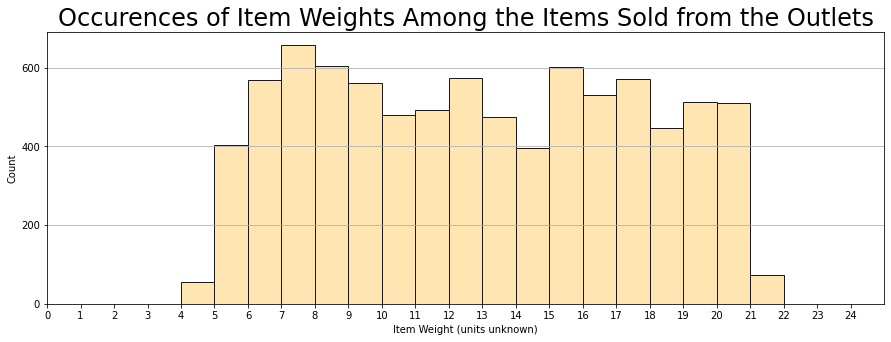

In [21]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 25, 1));
plt.xlim(0,25);
sns.set(font_scale=2,style="white")
item_weight_ax = sns.histplot(data=df_sales,x="Item_Weight",binwidth=1,binrange=(0,25),element="bars",color="#fc6", edgecolor="k",alpha=0.5)
item_weight_ax.set(title = "Occurences of Item Weights Among the Items Sold from the Outlets" ,xlabel ='Item Weight (units unknown)');
item_weight_ax.yaxis.grid(True);
item_weight_ax.tick_params(bottom=True, left=True)

>It appears that the weights are distributed almost uniformly across their range. If we plot the same data in a box plot, we should be able to reach the same conclusion.

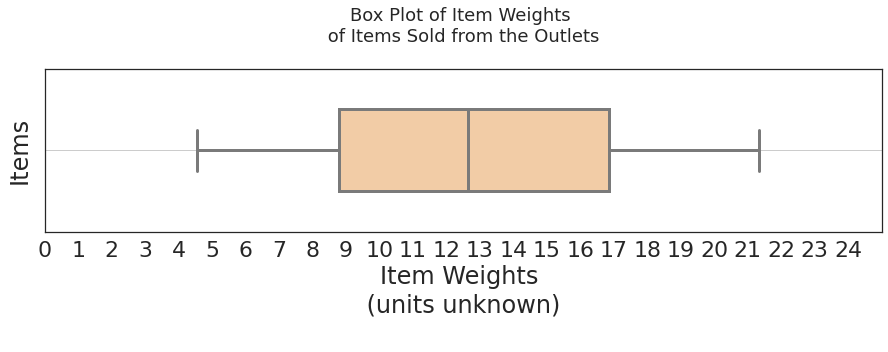

In [22]:
plt.figure(figsize=(15,3))
plt.xticks(np.arange(0, 25, 1));
plt.xlim(0,25);
sns.set(font_scale=1.5,style="white")
cute_colors= ["#fc9","#9cf"]
box_ax = sns.boxplot(data=df_sales, x="Item_Weight",orient="h",palette=cute_colors,linewidth=3,width=0.5);
box_ax.yaxis.grid(True);
#
box_ax.set(title='Box Plot of Item Weights \n of Items Sold from the Outlets \n',ylabel="Items",xlabel="Item Weights \n (units unknown) \n");

>And it does appear each quartile of the item weight data is approximately equal and there are no outliers. So yes, item weights are approximately uniformly distributed across their range.

>Looking at other properties such as item visibility gives a very different picture.

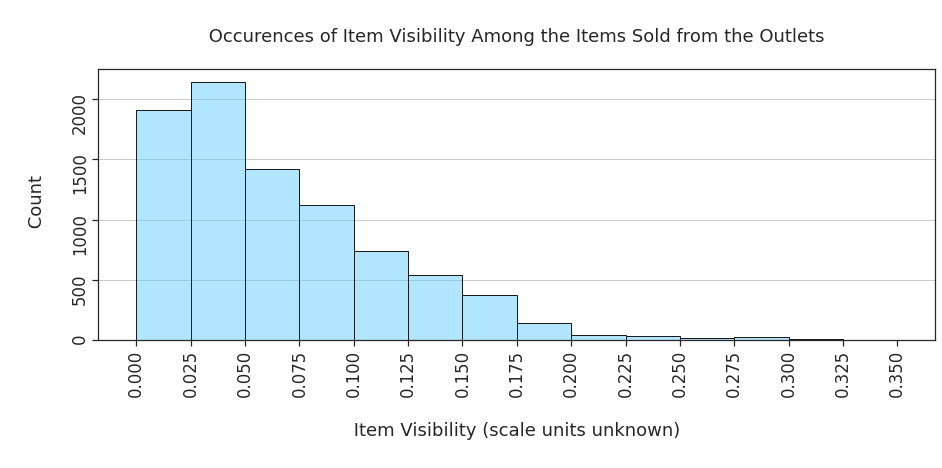

In [23]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 0.375, 0.025));
#plt.xlim(0,25);
sns.set(font_scale=1.5,style="white")
item_weight_ax = sns.histplot(data=df_sales,x="Item_Visibility",binwidth=0.025,binrange=(0,0.35),element="bars",color="#6cf", edgecolor="k",alpha=0.5)
item_weight_ax.set(title = "\n Occurences of Item Visibility Among the Items Sold from the Outlets \n" ,xlabel ='\n Item Visibility (scale units unknown) \n',ylabel ='\n Count\n');
item_weight_ax.yaxis.grid(True);
item_weight_ax.tick_params(bottom=True, left=True,rotation=90)

>Here we can see that most items have a low visibility value and the number of items with a given visibilty drops as the visibility rises (there is an negative correlation). However, the relationship is not linear, but might be a negative power relationship or have a poisson distribution. Further anaylsis will be required.

## ▶▶ Outlet Size/Type and Sales

>An interesting relationship is the sales of each item at each outlet.

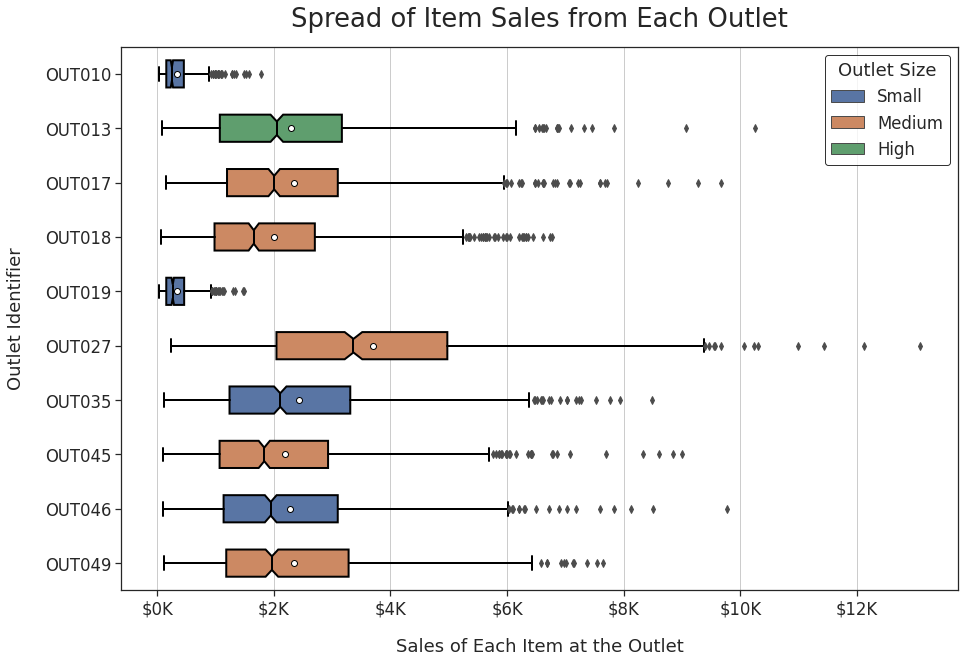

In [24]:
# define the format
def kdollar(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"${x*1e-3:.0f}K"
# create the formatter

kdollar_formatter = FuncFormatter(kdollar)

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5,style="white")
# sns.set(text.color="black")
box_ax = sns.boxplot(data=df_sales.sort_values(["Outlet_Identifier"]),\
                     x="Item_Outlet_Sales",\
                     y="Outlet_Identifier",\
                     hue="Outlet_Size",\
                     hue_order=["Small","Medium","High"],
                     linewidth=2,\
                     orient="h",\
                     notch=True,\
                     dodge=False,\
                     width=0.5,\
                     flierprops=dict(marker="d",color="black"),\
                     capprops=dict(color="black"),\
                     whiskerprops=dict(color="black"),\
                     boxprops=dict(edgecolor="black"),\
                     medianprops=dict(color="black"),\
                     meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"),showmeans=True);

box_ax.set_title("Spread of Item Sales from Each Outlet",fontsize="x-large",pad=20)
box_ax.set_xlabel("Sales of Each Item at the Outlet",labelpad=20)
box_ax.set_ylabel("Outlet Identifier",labelpad=20);
#box_ax.labelcolor("black")
box_ax.xaxis.grid(True);
box_ax.xaxis.set_major_formatter(kdollar_formatter)
box_ax.tick_params(bottom=True, left=True)
box_ax.legend(title="Outlet Size",edgecolor="black")

>This shows us that most items have sales figures that are similar across most outlets. Outlets `OUT010` and `OuT019` are the two low end exceptions, but remember they are also the two small grocery stores. This graph supports the interperation of the values I saw when I decided that `OUT010` should be small size.
>
>Notably, there is also the exceptionally larger sales of `OUT027`. But, currently there is no known reason why it is so high. Instead of classifying the outlets based on size, I can try outlet type.

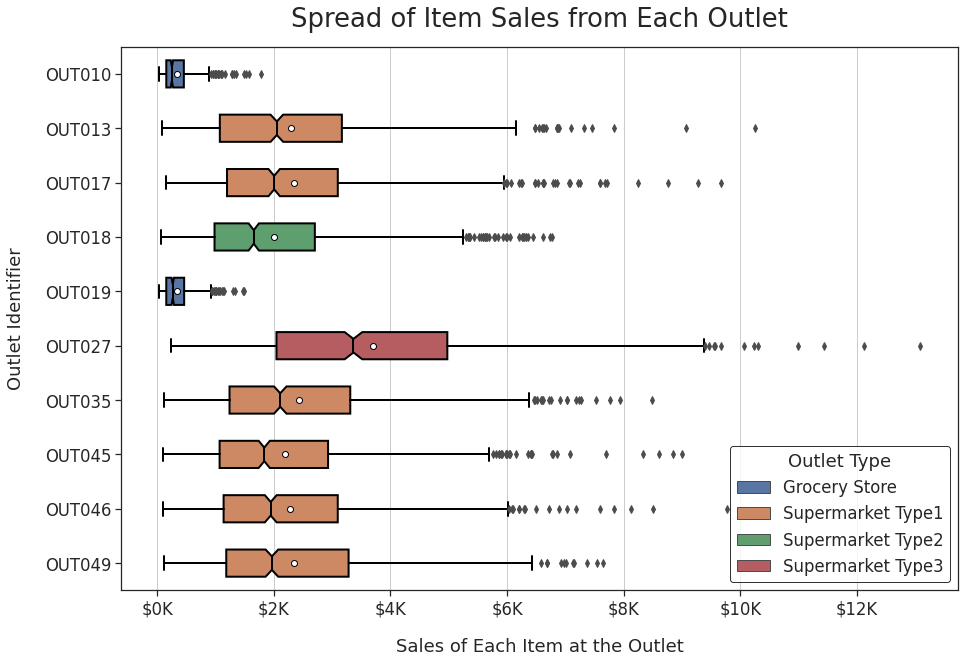

In [25]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5,style="white")
# sns.set(text.color="black")
box_ax = sns.boxplot(data=df_sales.sort_values(["Outlet_Identifier"]),\
                     x="Item_Outlet_Sales",\
                     y="Outlet_Identifier",\
                     hue="Outlet_Type",\
                     hue_order=["Grocery Store", "Supermarket Type1", "Supermarket Type2", "Supermarket Type3"],
                     linewidth=2,\
                     orient="h",\
                     notch=True,\
                     dodge=False,\
                     width=0.5,\
                     flierprops=dict(marker="d",color="black"),\
                     capprops=dict(color="black"),\
                     whiskerprops=dict(color="black"),\
                     boxprops=dict(edgecolor="black"),\
                     medianprops=dict(color="black"),\
                     meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"),showmeans=True);

box_ax.set_title("Spread of Item Sales from Each Outlet",fontsize="x-large",pad=20)
box_ax.set_xlabel("Sales of Each Item at the Outlet",labelpad=20)
box_ax.set_ylabel("Outlet Identifier",labelpad=20);
#box_ax.labelcolor("black")
box_ax.xaxis.grid(True);
box_ax.xaxis.set_major_formatter(kdollar_formatter)
box_ax.tick_params(bottom=True, left=True)
box_ax.legend(title="Outlet Type",edgecolor="black")

>Now it becomes apparent that `OUT027` is distinctly different that the other outlets in sales and this may be related to the type of outlet it is. It is the only type 3 supermarket. The data shows that grocery stores have the least sales and type 1 supermarkets have approximately the same level of sales.
>
>There is only one type 2 supermarket and only one type 3 supermarket in the list, so we can't be certain that there are not other factors involved yet. However, the type 2 appears to perform similarly to the type 1, and the type 3 appears to have sales much greater than the others.

>I can examine what factors might be at play to cause the differences in sales between the 
different outlets.

>First, I will examine the visibilty of the items in each outlet.

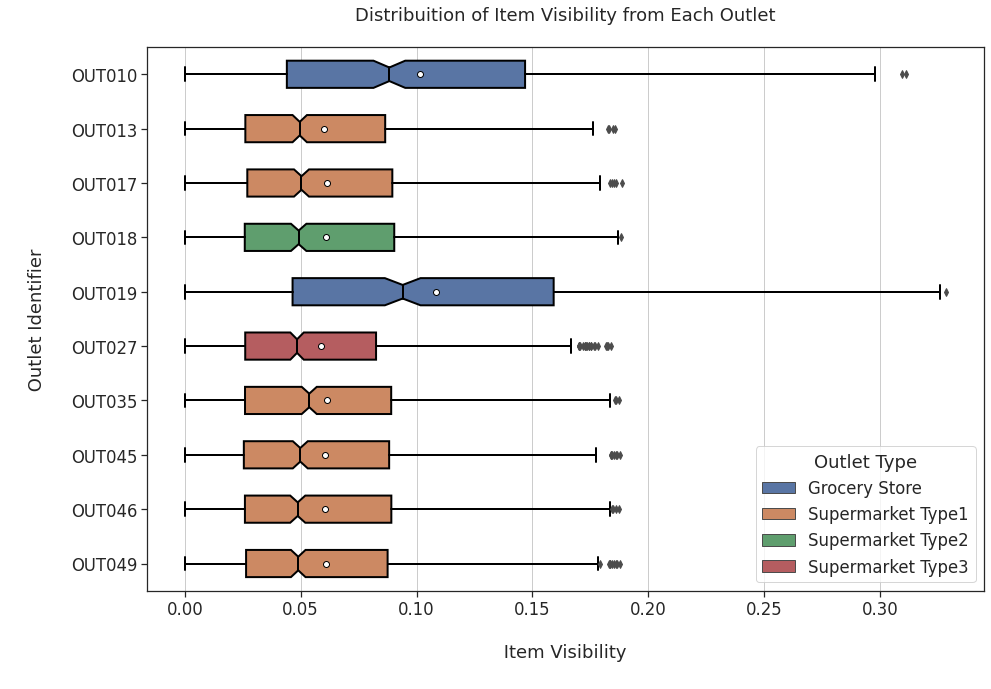

In [26]:
# define the format
def twodecimal(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"{x:.2f}"
# create the formatter
twodecimal_formatter = FuncFormatter(twodecimal)

plt.figure(figsize=(15,10))
sns.set(font_scale=1.5,style="white")
box_ax = sns.boxplot(data=df_sales.sort_values(["Outlet_Identifier"]),\
                     x="Item_Visibility",\
                     y="Outlet_Identifier",\
                     hue="Outlet_Type",\
                     hue_order=["Grocery Store", "Supermarket Type1", "Supermarket Type2", "Supermarket Type3"],\
                     linewidth=2,\
                     orient="h"\
                     ,notch=True,\
                     dodge=False,\
                     width=0.5,\
                     flierprops=dict(marker="d",color="black"),\
                     capprops=dict(color="black"),\
                     whiskerprops=dict(color="black"),\
                     boxprops=dict(edgecolor="black"),\
                     medianprops=dict(color="black"),\
                     meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"),showmeans=True);
box_ax.set(title="Distribuition of Item Visibility from Each Outlet\n ",ylabel="\n Outlet Identifier \n",xlabel="\n Item Visibility \n");
box_ax.xaxis.grid(True);
box_ax.xaxis.set_major_formatter(twodecimal_formatter)
box_ax.tick_params(bottom=True, left=True)
box_ax.legend(title="Outlet Type")

>From this, I can see that the visibility is the highest in the grocery stores. But I already know that they have the lowest sales. An the type 3 supermarket has similar visibility to al the other supermarkets. So I can conclude at this point that visibility does not increase sales.
>
>In fact, the type 3 supermarket appears to have a slightly lower visibilty distribution than all the other supermarkets. This may suggest that visibility actually decreases sales, which is a very counterintuitive conclusion. An analysis will be required to see if this is actually a statistically significant conclusion.

## ▶▶ Correlation Heatmap

>I will continue to look at other relationships between the various data, but it would be nice to have a guide to help. A heatmap of all the data can provide a quick reference for finding other relationship correlations that are not obvious.

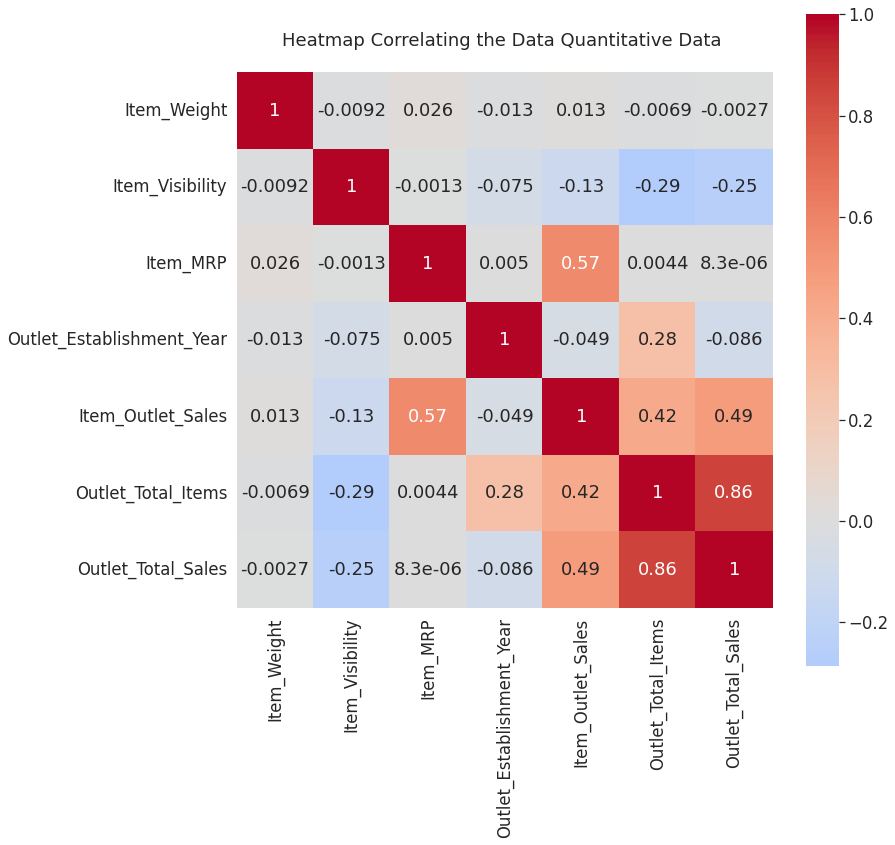

In [27]:
plt.figure(figsize=(12,12))
corr = df_sales.corr()
heat_ax = sns.heatmap(corr,cmap='coolwarm', annot=True,square=True,center=0)

heat_ax.set(title="Heatmap Correlating the Data Quantitative Data \n ");
heat_ax.xaxis.grid(True);

>I can see that `Item_Visibility` is negatively correlated to `Item_Outlet_Sales` (sales of each item type) and `Outlet_Total_Sales` (total sales made by the outlet). We already witness part of this in the comparison of the boxplots earlier. However, combining the data into a single scatterplot might reveal some details.

## ▶▶ Visibility and Sales

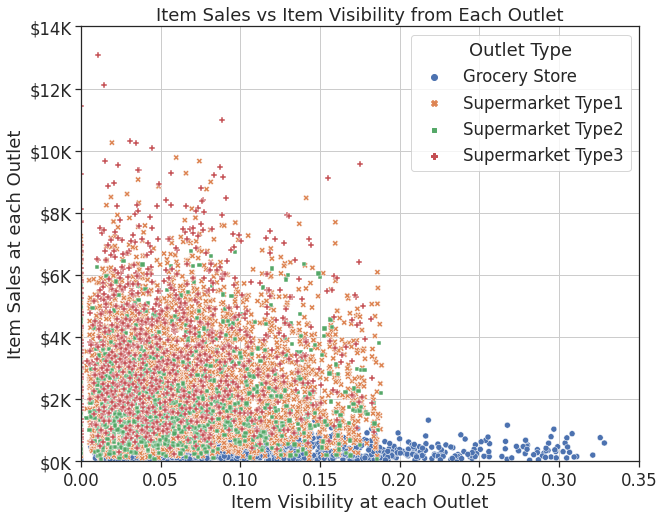

In [28]:
plt.figure(figsize=(10,8))
# plt.xticks(np.arange(0, 55, 5));
plt.xlim(0,0.35);
plt.ylim(0,14000);
this_ax = sns.scatterplot(data=df_sales.sort_values("Outlet_Type"),x="Item_Visibility",y="Item_Outlet_Sales",hue="Outlet_Type",style="Outlet_Type")
this_ax.set(title="Item Sales vs Item Visibility from Each Outlet",ylabel="Item Sales at each Outlet",xlabel="Item Visibility at each Outlet");
this_ax.yaxis.grid(True);
this_ax.yaxis.set_major_formatter(kdollar_formatter)
this_ax.xaxis.grid(True);
this_ax.tick_params(bottom=True, left=True)
this_ax.legend(title="Outlet Type")

>From this graph there is no clear relationship between visibility and sales. But these are the individual data from each item. Let's look at the aggragate statistics to see if there is anything new.

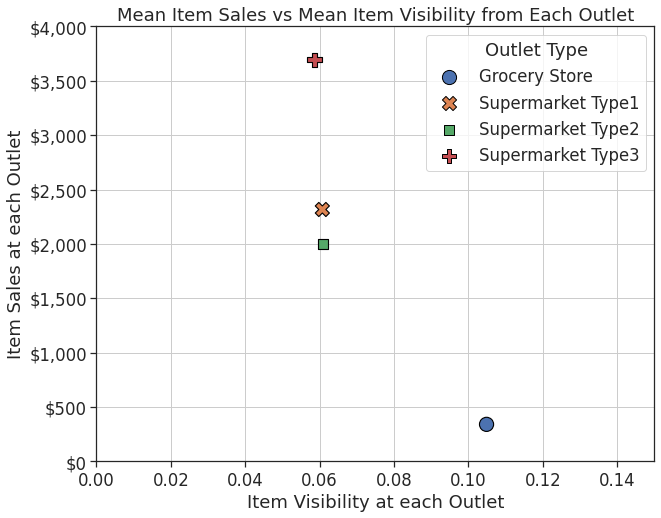

In [29]:
# define the format
def kdollar(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"${x:,.0f}"
# create the formatter

kdollar_formatter = FuncFormatter(kdollar)

plt.figure(figsize=(10,8))
# plt.xticks(np.arange(0, 55, 5));
plt.xlim(0,0.15);
plt.ylim(0,4000);
mean_ax = sns.scatterplot(data=df_sales.groupby("Outlet_Type").mean(),x="Item_Visibility",y="Item_Outlet_Sales",hue="Outlet_Type",style="Outlet_Type",s =200,edgecolor="black")
mean_ax.set(title="Mean Item Sales vs Mean Item Visibility from Each Outlet",ylabel="Item Sales at each Outlet",xlabel="Item Visibility at each Outlet");
mean_ax.yaxis.grid(True);
mean_ax.yaxis.set_major_formatter(kdollar_formatter)
mean_ax.xaxis.grid(True);
mean_ax.tick_params(bottom=True, left=True)

# Making the legend markers match the plotted markers:
# https://stackoverflow.com/questions/68094110/how-to-add-edge-line-to-markers-on-the-legend-using-matplotlib-seabornn
# https://www.codegrepper.com/code-examples/python/legend+marker+size+matplotlib
# Get the legend handles
handles, labels = mean_ax.get_legend_handles_labels()
# Iterate through the handles and call `set_edgecolor` on each
for h in handles:
    h.set_edgecolor("black")
    h._sizes=[200]

mean_ax.legend(handles, labels,title="Outlet Type",)

>It appears there is definitely a negatively correlated relationship between item visibility and item sales. Also, the item visibily appears to be a function of the outlet type. Whether this outlet type and visibility relationship is a result of the physical size and available space of the outlet or a function of the outlet operations is unknown.

## ▶▶ Fat Content and Sales

>It so happens that all the items can be classified based on their fat content. This may be important to understand which items sell better at the different outlet types and sizes as they likely serve different kinds of communities.

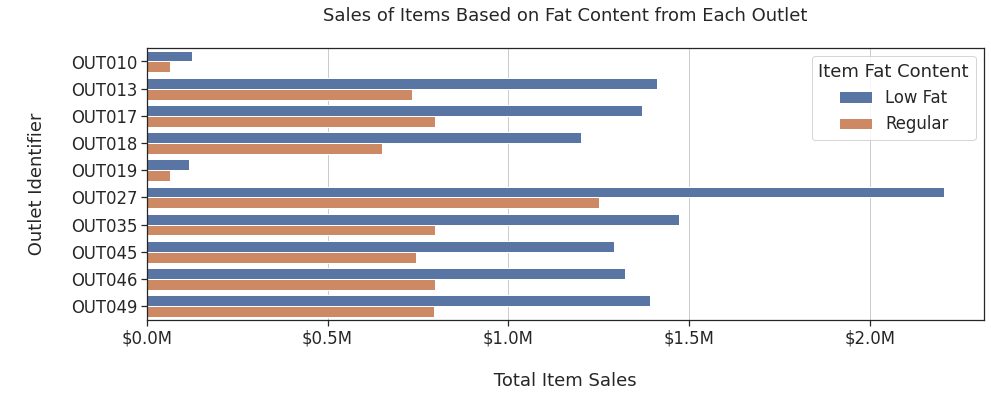

In [30]:
# define the format
def mdollar(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"${x*1e-6:,.1f}M"
# create the formatter

mdollar_formatter = FuncFormatter(mdollar)
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5,style="white")
bar_ax = sns.barplot(data=df_sales.groupby(["Outlet_Identifier","Item_Fat_Content"],as_index=False).sum(),\
                     y="Outlet_Identifier",\
                     x="Item_Outlet_Sales",\
                     hue="Item_Fat_Content",\
                     hue_order=["Low Fat", "Regular"])\
                    #  flierprops=dict(marker="d",color="black"),\
                    #  capprops=dict(color="black"),\
                    #  whiskerprops=dict(color="black"),\
                    #  boxprops=dict(edgecolor="black"),\
                    #  medianprops=dict(color="black"),\
                    #  meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"),showmeans=True);
bar_ax.set(title="Sales of Items Based on Fat Content from Each Outlet\n ",ylabel="\n Outlet Identifier \n",xlabel="\n Total Item Sales \n");
bar_ax.xaxis.grid(True);
bar_ax.xaxis.set_major_formatter(mdollar_formatter)
bar_ax.tick_params(bottom=True, left=True)
bar_ax.legend(title="Item Fat Content")

>It is clear that at all outlets, the low fat items out sell the regular fat items. However, this is affected by how many items of each kind are sold.

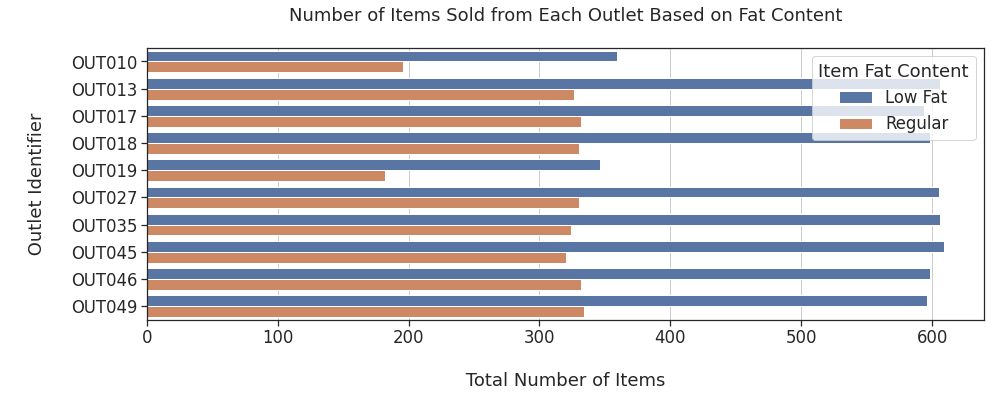

In [31]:
# define the format
def mdollar(x,pos):
    # function for use wth matplotlib FuncFormatter -  formats money in millions
    return f"${x*1e-6:,.1f}M"
# create the formatter

mdollar_formatter = FuncFormatter(mdollar)
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5,style="white")
bar_ax = sns.barplot(data=df_sales.groupby(["Outlet_Identifier","Item_Fat_Content"],as_index=False).count(),\
                     y="Outlet_Identifier",\
                     x="Item_Outlet_Sales",\
                     hue="Item_Fat_Content",\
                     hue_order=["Low Fat", "Regular"])\
                    #  flierprops=dict(marker="d",color="black"),\
                    #  capprops=dict(color="black"),\
                    #  whiskerprops=dict(color="black"),\
                    #  boxprops=dict(edgecolor="black"),\
                    #  medianprops=dict(color="black"),\
                    #  meanprops=dict(color="black",marker="o",markerfacecolor="white",markeredgecolor="black"),showmeans=True);
bar_ax.set(title="Number of Items Sold from Each Outlet Based on Fat Content\n ",ylabel="\n Outlet Identifier \n",xlabel="\n Total Number of Items \n");
bar_ax.xaxis.grid(True);
bar_ax.tick_params(bottom=True, left=True)
bar_ax.legend(title="Item Fat Content")

>So, it appears that approximatly twice as many low fat types of items are sold at each outlet than regular fat type of items. The size of the variety of items at each supermarket outlet is approximately the same regardless of size. The grocery stores, however, have about half of each fat type than the supermarkets.
>Since `OUT027` sells the same number of types of items, its sales figures are probably based on sales volumes.


---
# ▶ Preparing for some Machine Learning
---

To begin the machine learning process, I need to import some addtional functionality from the sci-kit learn library.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display="diagram")

## ▶▶ Reloading the Data

After some exploring of potenial relationships with the data, a more rigorous analysis should be done than visual estimation.

So I'll reload the original data so it has none of the modifications that I've applied to it and get it prepared for some Machine Learning.

In [33]:
df_sales = pd.read_csv(filename)
display(df_sales.head())
display(df_sales.info())

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

You can see that the missing values have returned and the columns I had added are now gone.

## ▶▶ Data Dictionary and Feature Types

Additionally, a Data Dictionary has been made availble. This can be used in conjunction with what we already know about the nature of each data column to determine whether they are supposed to be numeric, ordinal, or nominal features in the data set.

Variable | Description| Feature Type 
-|-|-
Item_Identifier|	Unique product ID |nominal
Item_Weight	|Weight of product|numeric
Item_Fat_Content|	Whether the product is low fat or regular |ordinal
Item_Visibility|	The percentage of total display area of all products in a store allocated to the particular product | numeric
Item_Type|	The category to which the product belongs |nominal
Item_MRP|	Maximum Retail Price (list price) of the product |numeric
Outlet_Identifier|	Unique store ID |nominal
Outlet_Establishment_Year|	The year in which store was established |ordinal
Outlet_Size	|The size of the store in terms of ground area covered |ordinal
Outlet_Location_Type |	The type of area in which the store is located | nominal
Outlet_Type |	Whether the outlet is a grocery store or some sort of supermarket |nominal
Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted. |numeric

This Data Dictionary confirms the assumption earlier that Item_Identifier should be unique to each product and Outlet_Identifier should be unique to each outlet.

It also confirms that the Item_Fat_Content should only have two values (low fat, regular) and the alternate spellings are not different fat content categories. So the correction to make the spellings of the fat content categories uniform can still be made before splitting the data in to train/test sets. (Although, the different spellings does present a line of other questions based on why this inconsistecy occured.)

I can rearrange the table so that it is easier to see the feature types by group.

Variable| Feature Type | Note
-|-|-
Item_Weight	| numeric
Item_MRP|numeric
Item_Outlet_Sales |numeric
-|-
Outlet_Establishment_Year |ordinal
Item_Fat_Content|ordinal| 
Outlet_Size	|ordinal
-|-
Item_Identifier|nominal |
Item_Type |nominal
Outlet_Identifier|nominal
Outlet_Location_Type  | nominal | We don't know if the numbered tiers are ranked by a quantifiable criteria.
Outlet_Type  |nominal | We don't know if the numbered supermarkets are ranked by a quantifiable criteria.




### ▶▶▶ Ordinal: Item_Fat_Content

The ordinal features will be encoded as ordered numbers. But first, "Item_Fat_Content" needs to be cleaned of its variant spellings.

In [34]:
# inspect the original string spellings
display(df_sales["Item_Fat_Content"].value_counts())
df_sales["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","reg":"Regular"}, inplace=True)
# inspect the corrected string spellings
display(df_sales["Item_Fat_Content"].value_counts())
df_sales["Item_Fat_Content"].replace({"Low Fat":0,"Regular":1}, inplace=True)
# inspect the encoded values
display(df_sales["Item_Fat_Content"].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

### ▶▶▶ Ordinal: Outlet_Size

The column "Outlet_Size" is also an ordinal feature, so I will encode it as ordered numbers, too.

In [35]:
# inspect the original string spellings
display(df_sales["Outlet_Size"].value_counts())
df_sales["Outlet_Size"].replace({"Small":0,"Medium":1,"High":2}, inplace=True)
# because there are NaN values in this data column, the replace methods wants the numeric values to be floats
# so the convert_dtypes() will change the floats to integers
# df_sales = df_sales.convert_dtypes()
display(df_sales["Outlet_Size"].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

And to check the data types:

In [36]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   float64
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 799.2+ KB


Everything looks OK so far. The Outlet_Size is float64 instead of int64 due to the presence of missing values. The missing values are numpy.nan which are also numpy.float64, so it forces all the integers in the column to become floats. I could convert them to pandas.NA values, but then the missing values wouldn't play nice with some of the sklearn methods. I'll be addressing this issue later.

## ▶▶ Splitting the Data

Since we would like to be able to predict the sales of different items at the various outlet, the `"Item_Outlet_Sales"` column will be split off as the target vector from the rest of the data.

Additionally, I will be dropping the `"Item_Identifier"` column. Since it is a nominal value that is unique for each item, it shouldn't affect the over-all outlet sales strategy at each outlet. Items can enter the market, become scarce, or leave the market. If your outlet sales strategy depends on only a few specific and unique items that could disappear, then you have a very fragile business model (by this I mean something like a specific brand of cheese in a specific size, not cheese in general).

I will not drop the `"Outlet_Identifier"` column, although it is also has nominal values unique to each outlet. There are only 10, and they may posses characteristics that affect the sales that 

Then the data will be split into a training set and a testing set.

(You may notice that I have not filled in the missing values from the `"Item_Weight"` and `"Outlet_Size"` columns. This is to avoid any data leaks. Especially the `"Outlet_Size"`, as the earlier exploration of the data used some guessing about the most probably sizes.)

In [37]:
target_name = "Item_Outlet_Sales"
unneeded_list = ["Item_Identifier"]
# Feature Matrix/Target Vector Split
X = df_sales.drop(columns=[target_name] + unneeded_list)
y = df_sales[target_name]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## ▶▶ Column Transformer Construction


I will build 3 pipeplines, one for each feature type. They will impute values for the missing data and then transfrom the data to standardize it.

Since there are only two columns with missing data, I only need Imputers for those two specifically.

The 3 pipelines will then be put into a column transformer.

### ▶▶▶ Create Imputers


The `"Item_Weight"` values are floats and can potentially take on any value across the measurable range. So using `SimpleImputer()`, I will choose the median value to estimate any missing values.

The `"Outlet_Size"` values are integers, taking only the three values 0, 1, and 2 (Small, Medium, and High). The most frequent value (the mode) will be my choice of estimation strategy for the `SimpleImputer()` (similar to my earlier choice when exploring the data). (Note: if there are multiple modes, the smallest will be chosen.)

None of the other columns are missing data, so they do not need any imputed data.

In [38]:
# Imputer for Item_Weight
med_imputer = SimpleImputer(strategy="median")
# Imputer for Outlet_Size
mode_imputer = SimpleImputer(strategy="most_frequent")

### ▶▶▶ Create Column Selectors

Both the columns to be imputed contain numeric values but will have different imputation strategies. So they need to be selected separately and put into separate pipelines.

All the numeric features have the float64 datatype and also have names that begin with "I", so I can build a column selector for them using their datatype and a pattern match.

The "Outlet_Size" is an ordinal feature, but has the column float64 datatype. Since it will use a different imputation strategy than the other float64 columns, it needs its own column selector.

The remaining ordinal features all have the int64 datatype. They don't need any imputation, so can be grouped together with their own column selector.

The nominal features (categorical features) also need to be grouped together and all be One-Hot encoded. They have no missing values, so imputation is not a concern.

In [39]:
# Numeric column selector
num_selector = make_column_selector(dtype_include="float64", pattern="I")
# Ordinal column selector for column with missing data
ord_selector = make_column_selector(dtype_include="float64", pattern="O")
# Nominal column selector (cat means catergory)
cat_selector = make_column_selector(dtype_include="object")

### ▶▶▶ Create Data Transformers

The transformers for each pipeline need to be created. The numeric data will be scaled using the standard scaler and the nominal data will be One-Hot encoded.
The ordinal data doesn't need to be transformed for this analysis.

In [40]:
# Transformer: Scaler
scaler = StandardScaler()
# Transformer: One-Hot Encoder
onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)

### ▶▶▶ Create Pipelines

The imputers and data transformers need to be put into piplines for each feature type. Fortunately, this data set only needs to be split into the three feature types and doesn't need to break them down further. (That might be necessary if multiple columns of the same feature type had missing values but needed different imputation strategies.)

A summary of the pipelines is in the following table:

Pipeline Feature Type | Imputer Strategy | Transformation Type
-|-|-
Numeric | Median | Standard Scaler
Ordinal (float) | Mode | (none)
Ordinal (int) | (none) | (none)
Nominal/Category | (none) | One Hot Encoder


In [41]:
# Numeric Pipeline:
num_pipe = make_pipeline( med_imputer, scaler )
# Ordinal Pipelines
ord_pipe = make_pipeline( mode_imputer )
# Nominal Pipeline
cat_pipe = make_pipeline( onehot )

### ▶▶▶ Create Column Transformer

Tuples need to be created that group a pipeline with the appropriate column selector.

In [42]:
num_tuple = ( num_pipe, num_selector )
ord_tuple = ( ord_pipe, ord_selector )
cat_tuple = ( cat_pipe, cat_selector )

Now, the column transformer can be assembled with the three tuples. Although all the data columns should be included, I will still have a "passthrough" for any columns that don't need to be imputed or transformed; in this case they are the ordinal features that have all their values. I will also display a graphic representation of the transformer to see that is was assembled as intended.

In [43]:
column_transformer = make_column_transformer( num_tuple, cat_tuple, ord_tuple,  remainder="passthrough")
# column_transformer = make_column_transformer( ord_tuple, cat_tuple, remainder="passthrough")
display(column_transformer)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48631ea5d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48631eab50>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f48631ea750>)])

## ▶▶ Transform the Data

The column transformer now needs to be fit to the training data. Then it will be used to transform both the training and testing data.

In [44]:
# Fit only using the training data (avoid data leaks).
column_transformer.fit(X_train)

# Transform both training and testing data using the training fit.
X_train_transformed = column_transformer.transform(X_train)
X_test_transformed = column_transformer.transform(X_test)

The data should now be transformed. We can take a look at the training data to see that it worked.


In [45]:
X_train_transformed

array([[ 8.27485474e-01, -7.12775072e-01,  1.82810922e+00, ...,
         1.00000000e+00,  0.00000000e+00,  2.00900000e+03],
       [ 5.66644319e-01, -1.29105225e+00,  6.03368881e-01, ...,
         1.00000000e+00,  1.00000000e+00,  2.00900000e+03],
       [-1.21027818e-01,  1.81331864e+00,  2.44540557e-01, ...,
         1.00000000e+00,  1.00000000e+00,  1.99900000e+03],
       ...,
       [ 1.12389588e+00, -9.20527127e-01,  1.52302674e+00, ...,
         1.00000000e+00,  0.00000000e+00,  2.00200000e+03],
       [ 1.77599877e+00, -2.27755201e-01, -3.83777076e-01, ...,
         1.00000000e+00,  0.00000000e+00,  2.00700000e+03],
       [ 8.27485474e-01, -9.58676827e-01, -7.38361046e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.99700000e+03]])

The data is now in a numpy array and has lost the column names. I can construct a list of column names. The nominal features were One-Hot encoded, so I will need to use the column transformer to extract the new names. The numeric features and the one imputed ordinal feature can have their names found using the column selector on the pre-transformed dataframe.

I can get the names of the last two ordinal columns that didn't have anything done to them by droping all the other columns. I use methods to do this instead of knowing what they should be, because if the column order for the X_train dataframe was changed relative to the original dataframe, I will have the columns mislabeled.

Additionally, I need to be sure to assemble the names in the same order that they were feed into the column transformer.


In [46]:
# numeric features
num_feature_names = num_selector(X_train)

# nominal features. more names due to one-hot encoding
cat_feature_names = list(column_transformer.named_transformers_["pipeline-2"].named_steps["onehotencoder"].get_feature_names_out(cat_selector(X_train)))

# ordinal feature for the imputed column
ord_feature_names = ord_selector(X_train)

# ordinal features for the untouched columns, which went into the remainder pipeline
remain_feature_names = list(X_train.drop(columns = num_feature_names).drop(columns = ord_feature_names).drop(columns = X_train[cat_selector].columns).columns)

# put them all together
feature_names_transformed = num_feature_names + cat_feature_names + ord_feature_names + remain_feature_names

In [47]:
display(X_train.shape)
pd.DataFrame(X_train_transformed).shape

(6392, 10)

(6392, 39)

The transformed training data has 6392 rows, just like the original training data.

However, it has a larger number of columns (30 columns) compared to the original (10 columns). This is due to the One-Hot encoding.

In [48]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns = feature_names_transformed).convert_dtypes()
X_test_transformed = pd.DataFrame(X_test_transformed, columns = feature_names_transformed).convert_dtypes()

In [49]:
X_train_transformed.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size,Item_Fat_Content,Outlet_Establishment_Year
0,0.827485,-0.712775,1.828109,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,2009
1,0.566644,-1.291052,0.603369,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,1,2009
2,-0.121028,1.813319,0.244541,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,1,1999
3,-1.158464,-1.004931,-0.952591,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,2004
4,1.53887,-0.965484,-0.33646,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,2002


# ▶ Machine Learning

In [50]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [51]:
# Create a function for reporting MAE, MSE, RMSE, and R2 metrics
def report_model_scores(data_set_name, model_name, y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)
  print(f"{data_set_name} Scores for {model_name} Model")
  print(f" MAE: {mae:,.3f}\n MSE: {mse:,.3f}\nRMSE: {rmse:,.3f}\n R^2: {r2:.3f}\n")

##  ▶▶ Baseline

In [52]:
# Create the model
dummy = DummyRegressor(strategy="mean")
# Create pipeline with model at the end
dummy_pipe = make_pipeline(column_transformer, dummy)
# Fit the pipeline. 
dummy_pipe.fit(X_train, y_train)
# Evaluate the model
report_model_scores("Training","Baseline", y_train, dummy_pipe.predict(X_train))
report_model_scores("Testing","Baseline", y_test, dummy_pipe.predict(X_test))

Training Scores for Baseline Model
 MAE: 1,360.218
 MSE: 2,959,455.705
RMSE: 1,720.307
 R^2: 0.000

Testing Scores for Baseline Model
 MAE: 1,326.121
 MSE: 2,772,144.463
RMSE: 1,664.976
 R^2: -0.005



## ▶▶ Linear Regression

In [53]:
# Create the model
lin_reg = LinearRegression()
# Create pipeline with model at the end
lin_reg_pipe = make_pipeline(column_transformer, lin_reg)
# Fit the pipeline
lin_reg_pipe.fit(X_train, y_train);
# Evaluate the model
report_model_scores("Training","Linear Regression", y_train, lin_reg_pipe.predict(X_train))
report_model_scores("Testing","Linear Regression", y_test, lin_reg_pipe.predict(X_test))

Training Scores for Linear Regression Model
 MAE: 848.390
 MSE: 1,299,047.679
RMSE: 1,139.758
 R^2: 0.561

Testing Scores for Linear Regression Model
 MAE: 804.848
 MSE: 1,194,820.387
RMSE: 1,093.078
 R^2: 0.567



## ▶▶ Regression Tree

In [54]:
# Create the model
dec_tree = DecisionTreeRegressor()
# Create pipeline with model at the end
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)
# Fit the pipeline
dec_tree_pipe.fit(X_train, y_train);
# Evaluate the model
report_model_scores("Training","Decision Tree Regressor", y_train, dec_tree_pipe.predict(X_train))
report_model_scores("Testing","Decision Tree Regressor", y_test, dec_tree_pipe.predict(X_test))

Training Scores for Decision Tree Regressor Model
 MAE: 0.000
 MSE: 0.000
RMSE: 0.000
 R^2: 1.000

Testing Scores for Decision Tree Regressor Model
 MAE: 1,033.367
 MSE: 2,189,079.933
RMSE: 1,479.554
 R^2: 0.207



The Decision Tree Regressor is clearly very bad at this point. It perfectly fits the training data, and is absolutely worthless with the testing data.

However, by default the maximum depth of the tree has no limit. This allowed the regressor to overfit with the training data and fit the noise in the data.

### ▶▶▶ Modify Tree Depth

In [55]:
display(dec_tree.get_params())
print("\nMaximum Depth used:", dec_tree.get_depth())

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}


Maximum Depth used: 40


I can restrict the depth to find a better performance, but I will need to do a search through to narrow in on a better maximum depth limit.

In [56]:
# create an empty dataframe for saving the scores
dec_tree_scores = pd.DataFrame(columns=["max_depth", "Train", "Test", "Difference"])

# Set the range for maximum depth limits
max_depth_limit = range(1, dec_tree.get_depth())

for depth in max_depth_limit:
    # Create the model
    trial_dec_tree = DecisionTreeRegressor(random_state=42, max_depth = depth)
    # Create pipeline with model at the end
    trial_dec_tree_pipe = make_pipeline(column_transformer, trial_dec_tree)
    # Fit the pipeline
    trial_dec_tree_pipe.fit(X_train, y_train)
    # Evaluate the model
    trial_r2_train = r2_score(y_train, trial_dec_tree_pipe.predict(X_train))
    trial_r2_test = r2_score(y_test, trial_dec_tree_pipe.predict(X_test))
    dec_tree_scores.loc[depth,"max_depth"] = depth
    dec_tree_scores.loc[depth,"Train"] = trial_r2_train
    dec_tree_scores.loc[depth,"Test"] = trial_r2_test
    dec_tree_scores.loc[depth,"Difference"] = trial_r2_train - trial_r2_test

Just a peak to see that the new data frame is being constructed as expected.

In [57]:
dec_tree_scores.head()

,max_depth,Train,Test,Difference
1,1,0.237797,0.229683,0.008115
2,2,0.431641,0.433778,-0.002137
3,3,0.524218,0.524222,-0.000004
4,4,0.582625,0.584005,-0.001379
5,5,0.603933,0.594709,0.009224


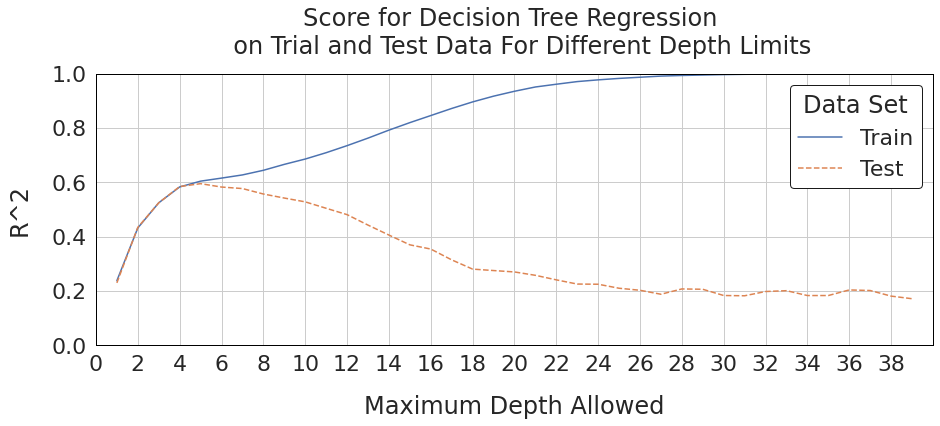

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Note to self: legend properties can be found in matplotlib.legend
sns.set_theme(context="notebook",style="whitegrid",font="sans-serif",font_scale=2, rc={"figure.figsize":(15,5),"legend.frameon":True,"legend.framealpha":1,"legend.edgecolor":"k"})
ax_1 = sns.lineplot(data=dec_tree_scores, x="max_depth",y="Train")
ax_2 = sns.lineplot(data=dec_tree_scores, x="max_depth",y="Test", linestyle="--")
ax_1.set_title("Score for Decision Tree Regression \n  on Trial and Test Data For Different Depth Limits", pad=20)
ax_1.set_xlabel("Maximum Depth Allowed", labelpad=20)
ax_1.set_ylabel("R^2", labelpad=20)
ax_1.legend(title="Data Set", labels=["Train","Test"])
ax_1.set_xticks(range(0,40,2))
ax_1.set_xticklabels(range(0,40,2))
ax_1.set_xlim(0,40)
ax_1.set_ylim(0,1)
for _,s in ax_1.spines.items():
    s.set_linewidth(1)
    s.set_color('black')

Wow! However, it clearly shows that the best results occur when the maximum depth is somewhere around 4 through 6.

I will choose a maximum depth of 5 for optimizing the regression tree.

In [59]:
# Create the model
dec_tree = DecisionTreeRegressor(max_depth=5)
# Create pipeline with model at the end
dec_tree_pipe = make_pipeline(column_transformer, dec_tree)
# Fit the pipeline
dec_tree_pipe.fit(X_train, y_train);
# Evaluate the model
report_model_scores("Training","Decision Tree Regressor", y_train, dec_tree_pipe.predict(X_train))
report_model_scores("Testing","Decision Tree Regressor", y_test, dec_tree_pipe.predict(X_test))

Training Scores for Decision Tree Regressor Model
 MAE: 762.640
 MSE: 1,172,142.044
RMSE: 1,082.655
 R^2: 0.604

Testing Scores for Decision Tree Regressor Model
 MAE: 738.356
 MSE: 1,118,187.946
RMSE: 1,057.444
 R^2: 0.595



### ▶▶▶ Bagged Tree

I can exam the bagging tree to see if will produce a better results than the regression tree.

In [76]:
from sklearn.ensemble import BaggingRegressor

In [77]:
# Create the model
bag_reg = BaggingRegressor(random_state=42)
# Create pipeline with model at the end
bag_reg_pipe = make_pipeline(column_transformer, bag_reg)
# Fit the pipeline
bag_reg_pipe.fit(X_train, y_train)
# Evaluate the model
report_model_scores("Training","Bagging Regressor", y_train, bag_reg_pipe.predict(X_train))
report_model_scores("Testing","Bagging Regressor", y_test, bag_reg_pipe.predict(X_test))

Training Scores for Bagging Regressor Model
 MAE: 319.679
 MSE: 240,379.685
RMSE: 490.285
 R^2: 0.919

Testing Scores for Bagging Regressor Model
 MAE: 780.133
 MSE: 1,279,535.185
RMSE: 1,131.165
 R^2: 0.536



The bagging tree clearly does not perform well, so I will forget about it.

### ▶▶▶ Random Forest

The regression tree can be compared to one of its variants, the random forest. I will use the same maximum depth limit as the regression tree.

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
# Create the model
ran_for = RandomForestRegressor(random_state=42, max_depth=5)
# Create pipeline with model at the end
ran_for_pipe = make_pipeline(column_transformer, ran_for)
# Fit the pipeline
ran_for_pipe.fit(X_train, y_train)
# Evaluate the model
report_model_scores("Training","Random Forest Regressor", y_train, ran_for_pipe.predict(X_train))
report_model_scores("Testing","Random Forest Regressor", y_test, ran_for_pipe.predict(X_test))

Training Scores for Random Forest Regressor Model
 MAE: 755.393
 MSE: 1,152,591.830
RMSE: 1,073.588
 R^2: 0.611

Testing Scores for Random Forest Regressor Model
 MAE: 728.387
 MSE: 1,096,393.802
RMSE: 1,047.088
 R^2: 0.603



The random forest performs marginally better than the regression tree.

# ▶ Choosing the Better Model

A summary of the coefficient of determination (R^2):

Data Set|Baseline Model| Linear Regression | Regession Tree | Random Forest
-|-|-|-|-
Training |0.000|0.561|0.604|0.611
Testing |-0.005|0.567|0.595|0.603

For the coeffecient of determination, higher values are better as it represents how well the model explains the data. Here, the random forest performs better than the regression tree, which performs better than the linear regression.


A summary of the root mean squared error (RMSE):

Data Set|Baseline Model| Linear Regression | Regession Tree | Random Forest
-|-|-|-|-
Training|1,720.307| 1,139.758|1,082.655|1,073.588
Testing |1,664.976|1,093.078|1057.444|1,047.088

For the root mean squared error, lower values are better as it represents how spread the data is away from the model. Here, the random forest performs better than the regression tree, which performs better than the linear regression.

So, I conclude that because the random forest is the best model of these, and the regression tree is almost as good. The linear regression, performs the worst of these (excluding the baseline model).
